Epoch 1/20


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 2s - 5ms/step - accuracy: 0.1731 - loss: 0.0891 - val_accuracy: 0.2877 - val_loss: 0.0859
Epoch 2/20
469/469 - 2s - 4ms/step - accuracy: 0.3629 - loss: 0.0826 - val_accuracy: 0.4400 - val_loss: 0.0789
Epoch 3/20
469/469 - 2s - 4ms/step - accuracy: 0.4734 - loss: 0.0756 - val_accuracy: 0.5211 - val_loss: 0.0716
Epoch 4/20
469/469 - 2s - 5ms/step - accuracy: 0.5513 - loss: 0.0686 - val_accuracy: 0.5966 - val_loss: 0.0647
Epoch 5/20
469/469 - 2s - 4ms/step - accuracy: 0.6167 - loss: 0.0622 - val_accuracy: 0.6522 - val_loss: 0.0585
Epoch 6/20
469/469 - 2s - 5ms/step - accuracy: 0.6629 - loss: 0.0566 - val_accuracy: 0.6892 - val_loss: 0.0533
Epoch 7/20
469/469 - 2s - 5ms/step - accuracy: 0.6966 - loss: 0.0519 - val_accuracy: 0.7185 - val_loss: 0.0490
Epoch 8/20
469/469 - 2s - 5ms/step - accuracy: 0.7200 - loss: 0.0480 - val_accuracy: 0.7396 - val_loss: 0.0454
Epoch 9/20
469/469 - 2s - 5ms/step - accuracy: 0.7366 - loss: 0.0448 - val_accuracy: 0.7563 - val_loss: 0.0424
Epoch 10/20


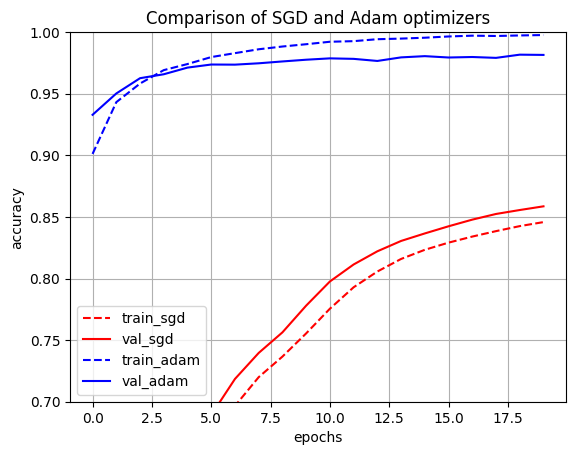

In [2]:
# SGD와 ADAM의 비교 시각화 코드 
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# 학습 데이터 로드
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
# 데이터 값에 대한 처리... 
# 784 값은 앞서 얻었던 (60000, 28, 28)의 값을 변형한 것임.
# 2차원 텐서의 값을 1차원 형식으로 표현.  
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
# 각 값을 0 ~ 1 사이의 값으로 변환
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
# 각 레이블을 표현하는 값을 categorical로 변환
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델(SGD)
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

# 모델 컴파일(SGD)
mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
# 모델 학습(SGD)
hist_sgd = mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)
# 모델 검증(SGD)
res=mlp_sgd.evaluate(x_test,y_test,verbose=0)
print('(SGD)정확률=',res[1]*100)

# 모델(Adam)
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

# 모델 컴파일(Adam)
mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
# 모델 학습(Adam)
hist_adam = mlp_adam.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)

# 모델 검증(Adam)
res=mlp_adam.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)


import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()